# AE332: Modelling and Analysis Lab 
## Session 2: Simulating a Cannonball 
---
**Name:** Gaurav Gupta

**SC-Code:** SC21B026

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Atmosphere as atm
import scipy.integrate as sci

## Simulation of Cannonball in Vacuum 

In [42]:
#Initital Conditions
u = 442.71888
theta = np.radians(45)
m = 40
g = 9.8
sol0 = np.array([0, u*np.cos(theta),0, u*np.sin(theta)])
def derive(t,u):
    return [u[1], 0, u[3],  -g]
t0, tf = 0, 100
t_eval = np.linspace(0,100, 100000)

def hit_ground(t,y):
    return y[2]
hit_ground.terminal = True
hit_ground.direction = -1

In [43]:
sol = sci.solve_ivp(derive, (t0, tf), sol0, t_eval = t_eval, dense_output=True, events=hit_ground)

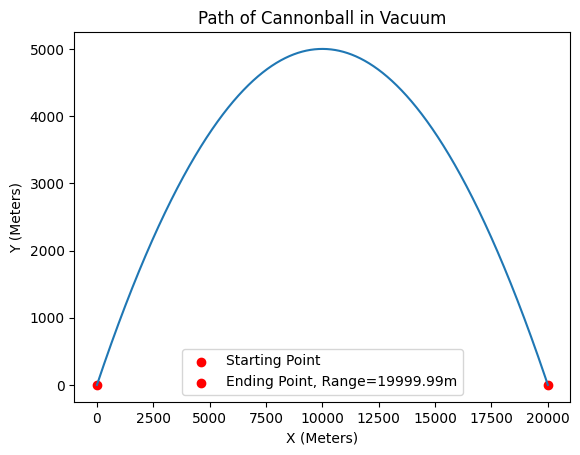

In [44]:
plt.plot(sol.y[0], sol.y[2])
plt.xlabel('X (Meters)')
plt.ylabel('Y (Meters)')
plt.title('Path of Cannonball in Vacuum')
plt.scatter(sol.y[0][0], sol.y[2][0], color='r', label='Starting Point')
plt.scatter(sol.y[0][-1], sol.y[2][-1], color = 'r', label = 'Ending Point, Range={}m'.format(np.round(sol.y[0][-1], 2)))
plt.legend()
solVacuum = sol

In [45]:
v = np.hypot(sol.y[1], sol.y[3])
E = m*g*sol.y[2] + 0.5*m*v*v
print("Error: ", np.abs(np.max(E-(0.5*m*u*u))))

Error:  5.587935447692871e-09


In [46]:
#Reducing the rtol and atol
sol = sci.solve_ivp(derive, (t0, tf), sol0, t_eval = t_eval, dense_output=True, events=hit_ground, rtol=1e-12, atol=1e-12)
v = np.hypot(sol.y[1], sol.y[3])
E = m*g*sol.y[2] + 0.5*m*v*v
print("Error: ", np.abs(np.max(E-(0.5*m*u*u))))

Error:  1.4901161193847656e-08


## Cannonball in Atmosphere

### Problem 1

In [47]:
#Initital Conditions
u = 442.71888
theta = np.radians(45)
m = 40
g = 9.8
rho_s = 8000
d = np.cbrt(6*m/np.pi/rho_s)

s = np.pi*d*d/4
sol0 = np.array([0, u*np.cos(theta),0, u*np.sin(theta), 0.5*m*u*u])
def derive(t,u):
    v = np.hypot(u[1],u[3])
    prm = atm.atmParam(u[2],v) #Temp(h), Density(h) , Viscosity(h), Mach(h,v), logRe(h,v), Cd(h,v)
    fd = 0.5*prm[1]*v*s*prm[5]
    return [u[1], -fd*u[1]/m, u[3],  -g - (fd*u[3]/m), fd * v *v]
t0, tf = 0, 100
t_eval = np.linspace(0,100, 100000)


def hit_ground(t,y):
    return y[2]
hit_ground.terminal = True
hit_ground.direction = -1

In [48]:
sol = sci.solve_ivp(derive, (t0, tf), sol0, t_eval = t_eval, dense_output=True, events=hit_ground)

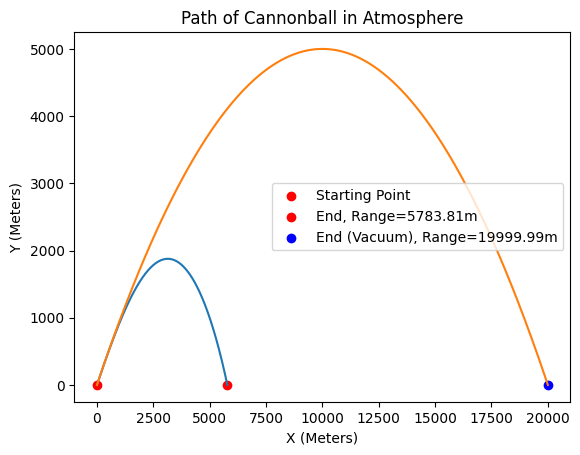

In [49]:
plt.plot(sol.y[0], sol.y[2])
plt.plot(solVacuum.y[0], solVacuum.y[2])
plt.xlabel('X (Meters)')
plt.ylabel('Y (Meters)')
plt.title('Path of Cannonball in Atmosphere')
plt.scatter(sol.y[0][0], sol.y[2][0], color='r', label='Starting Point')
plt.scatter(sol.y[0][-1], sol.y[2][-1], color = 'r', label = 'End, Range={}m'.format(np.round(sol.y[0][-1], 2)))
plt.scatter(solVacuum.y[0][-1], solVacuum.y[2][-1], color = 'b', label = 'End (Vacuum), Range={}m'.format(np.round(solVacuum.y[0][-1], 2)))
plt.legend(loc='center right')

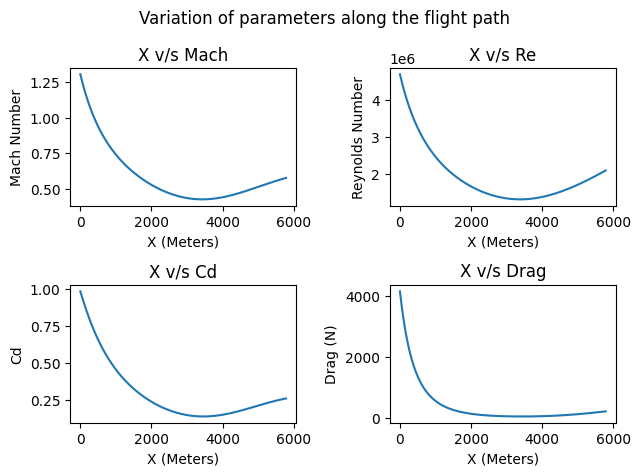

In [50]:
v = np.hypot(sol.y[1],sol.y[3])
prm = atm.atmParam(sol.y[2],v) #Temp(h), Density(h) , Viscosity(h), Mach(h,v), logRe(h,v), Cd(h,v)
plt.subplot(2,2,1)
plt.plot(sol.y[0], prm[3], label='Mach Number')
plt.xlabel('X (Meters)')
plt.ylabel('Mach Number')
plt.title("X v/s Mach")
plt.subplot(2,2,2)
plt.plot(sol.y[0], np.exp(prm[4]), label='Reynolds Number')
plt.xlabel('X (Meters)')
plt.ylabel('Reynolds Number')
plt.title("X v/s Re")
plt.subplot(2,2,3)
plt.plot(sol.y[0], prm[5], label='Cd')
plt.xlabel('X (Meters)')
plt.ylabel('Cd')
plt.title("X v/s Cd")
plt.subplot(2,2,4)
fd = 0.5*prm[1]*v*v*s*prm[5]
plt.plot(sol.y[0], fd, label='Cd')
plt.xlabel('X (Meters)')
plt.ylabel('Drag (N)')
plt.title("X v/s Drag")
plt.suptitle("Variation of parameters along the flight path")
plt.tight_layout(pad=1)

Error:  3389.597687105648


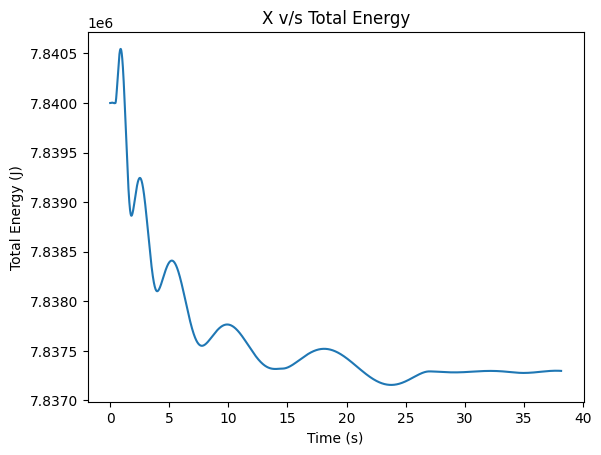

In [51]:
E = m*g*sol.y[2] + 0.5*m*v*v + sol.y[4]
plt.plot(sol.t, E)
plt.xlabel('Time (s)')
plt.ylabel('Total Energy (J)')
plt.title("X v/s Total Energy")
print("Error: ",np.abs(np.max(E) - np.min(E)))

In [52]:
#Reducing atol and vtol
sol = sci.solve_ivp(derive, (t0, tf), sol0, t_eval = t_eval, dense_output=True, events=hit_ground, atol=1e-13, rtol=1e-13)
v = np.hypot(sol.y[1],sol.y[3])
E = m*g*sol.y[2] + 0.5*m*v*v + sol.y[4]
print("Error: ", np.abs(np.max(E) - np.min(E)))

Error:  6.882473826408386e-07


## Problem 2

In [1]:
#intitial conditions
u = 710
theta = np.radians(45)
m = 20000
g = 9.8
rho_s = 8000
d = np.cbrt((6*m)/(np.pi*rho_s))
s = np.pi*d*d/4
sol0 = np.array([0, u*np.cos(theta),0, u*np.sin(theta), 0.5*m*u*u])
def derive(t,u):
    v = np.hypot(u[1],u[3])
    prm = atm.atmParam(u[2],v) #Temp(h), Density(h) , Viscosity(h), Mach(h,v), logRe(h,v), Cd(h,v)
    fd = 0.5*prm[1]*v*s*prm[5]
    return [u[1], -fd*u[1]/m, u[3],  -g - (fd*u[3]/m), fd * v *v]
t0, tf = 0, 100
t_eval = np.linspace(0,100, 100000)

def hit_ground(t,y):
    return y[2]
hit_ground.terminal = True
hit_ground.direction = -1

NameError: name 'np' is not defined

In [94]:
sol = sci.solve_ivp(derive, (t0, tf), sol0, t_eval = t_eval, dense_output=True, events=hit_ground)

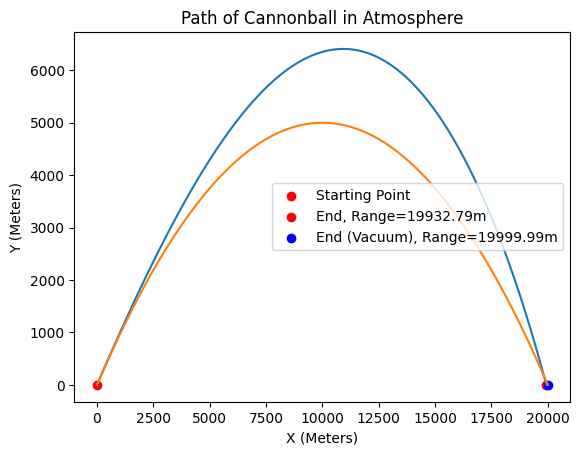

In [95]:
plt.plot(sol.y[0], sol.y[2])
plt.plot(solVacuum.y[0], solVacuum.y[2])
plt.xlabel('X (Meters)')
plt.ylabel('Y (Meters)')
plt.title('Path of Cannonball in Atmosphere')
plt.scatter(sol.y[0][0], sol.y[2][0], color='r', label='Starting Point')
plt.scatter(sol.y[0][-1], sol.y[2][-1], color = 'r', label = 'End, Range={}m'.format(np.round(sol.y[0][-1], 2)))
plt.scatter(solVacuum.y[0][-1], solVacuum.y[2][-1], color = 'b', label = 'End (Vacuum), Range={}m'.format(np.round(solVacuum.y[0][-1], 2)))
plt.legend(loc='center right')

The feasibility of acheiving of the 20km range is very low since providing the initial velocity of 710 m/s is not practical. As we increase the mass of the cannon ball, the diameter of the ball also increases which in turn increases the drag.

### Sensitivity of Elevation Angle with Range

In [39]:
#Initital Conditions
u = 442.71888
m = 40
g = 9.8
rho_s = 8000
d = np.cbrt(6*m/np.pi/rho_s)
s = np.pi*d*d/4

def derive(t,u):
    v = np.hypot(u[1],u[3])
    prm = atm.atmParam(u[2],v) #Temp(h), Density(h) , Viscosity(h), Mach(h,v), logRe(h,v), Cd(h,v)
    fd = 0.5*prm[1]*v*s*prm[5]
    return [u[1], -fd*u[1]/m, u[3],  -g - (fd*u[3]/m), fd * v *v]
t0, tf = 0, 100
t_eval = np.linspace(0,100, 100000)


def hit_ground(t,y):
    return y[2]
hit_ground.terminal = True
hit_ground.direction = -1

In [40]:
thetaL = np.arange(0,91,0.5)
Range = np.ones_like(thetaL)
for x in range(thetaL.size):
    theta = thetaL[x]*np.pi/180
    sol0 = np.array([0, u*np.cos(theta),0, u*np.sin(theta), 0.5*m*u*u])
    sol = sci.solve_ivp(derive, (t0, tf), sol0, t_eval = t_eval, dense_output=True, events=hit_ground)
    Range[x] = np.max(sol.y[0])

Text(0.5, 1.0, 'Variation of Range with Elevation Angle $(0^\\circ-90^\\circ)$ ')

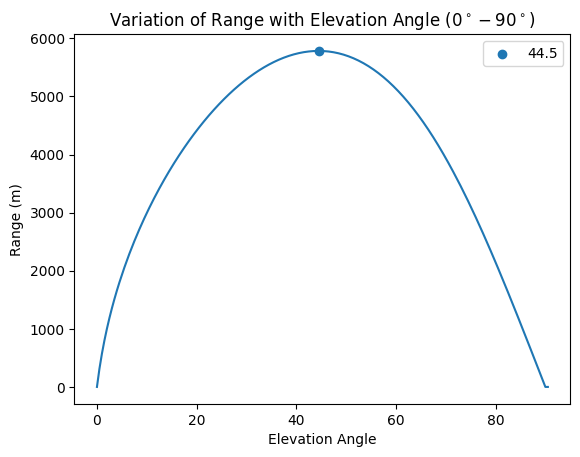

In [41]:
plt.plot(thetaL, Range)
thetamax = thetaL[np.where(Range==np.max(Range))]
plt.scatter(thetamax, np.max(Range), label=str(thetamax[0])) 
plt.xlabel('Elevation Angle')
plt.ylabel('Range (m)')
plt.legend()
plt.title(r"Variation of Range with Elevation Angle $(0^\circ-90^\circ)$ ")

The derivative of the above curve gives the sensitivity of range with respect to elevation angle. 